## 1. Bias

Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias means the model is too simple and cannot capture the underlying patterns of the data. This often leads to underfitting. (Bias is the accuracy of our predictions.)

#### High Bias:

The model makes strong assumptions about the data. It may fail to capture important patterns and relationships.

#### Low Bias:

The model is more flexible and can capture more details of the data.

Example:

A linear model (simple) trying to fit a nonlinear relationship would exhibit high bias.


## 2. Variance

Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training data. High variance means the model is too complex and captures the noise in the training data, rather than the intended outputs. This often leads to overfitting.

#### High Variance:

The model captures noise along with the underlying patterns in the training data, making it perform poorly on new, unseen data.

#### Low Variance:

The model is more stable and consistent in its predictions across different datasets.

Example:

A polynomial model of a very high degree trying to fit the same nonlinear relationship would exhibit high variance.

## 3. Bias-Variance Tradeoff

The goal in machine learning is to find the right balance between bias and variance to minimize the overall prediction error. This is known as the bias-variance tradeoff:

High Bias + Low Variance: Model is too simple (underfits the data).

Low Bias + High Variance: Model is too complex (overfits the data).

Optimal Balance: The model appropriately fits the training data while generalizing well to unseen data.

## 4. Visualization of Bias and Variance

A good way to visualize bias and variance is through error decomposition on a test dataset:

Total Error= squr(Bias)+Variance+Irreducible Error

Irreducible Error: This is the noise inherent in any dataset that cannot be removed.

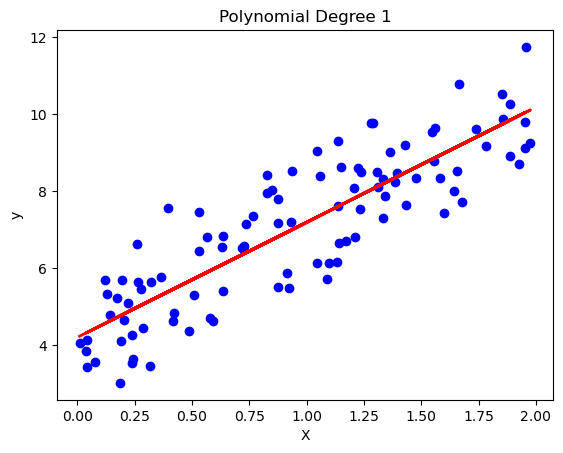

Degree 1
Training Error: 1.011336091042755
Testing Error: 0.9177532469714288



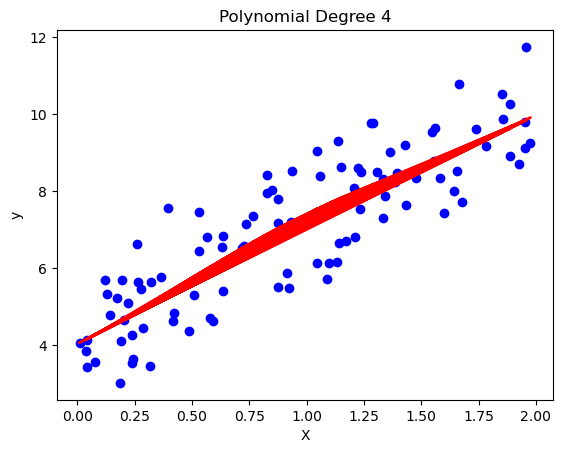

Degree 4
Training Error: 0.9875972829929139
Testing Error: 0.9158793703602957



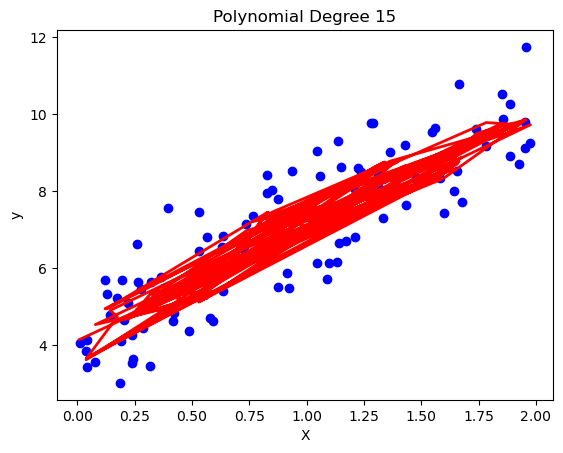

Degree 15
Training Error: 0.8608554107435097
Testing Error: 1.2535629344554362



In [1]:
# Code Example: Bias and Variance with Polynomial Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the model
def plot_model(X, y, model, degree):
    plt.scatter(X, y, color='blue')
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    y_poly_pred = model.predict(X_poly)
    plt.plot(X, y_poly_pred, color='red', linewidth=2)
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

# Train and plot models with different polynomial degrees
degrees = [1, 4, 15]  # Degrees of polynomial
models = []

for degree in degrees:
    # Transform the features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    models.append(model)
    
    # Plot the model
    plot_model(X, y, model, degree)
    
    # Calculate training and testing error
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    print(f'Degree {degree}')
    print(f'Training Error: {train_error}')
    print(f'Testing Error: {test_error}\n')

### Code Explanation

1. Data Generation: We generate sample data with a linear relationship and some noise.
2. Data Splitting: We split the data into training and testing sets.
3. Model Training and Plotting: We train polynomial regression models with different degrees and plot the results.
    * A degree-1 polynomial (linear model) will likely underfit, showing high bias.
    * A degree-4 polynomial might provide a good balance between bias and variance.
    * A degree-15 polynomial will likely overfit, showing high variance.
4. Error Calculation: We calculate and print the training and testing errors for each model. This helps in understanding the bias-variance tradeoff.

### If you have HIGH VARIANCE PROBLEM:

1. You can get more training examples because a larger the dataset is more probable to get a higher predictions.
2. Try smaller sets of features (because you are overfitting)
3. Try increasing lambda, so you can not overfit the training set as much. The higher the lambda, the more the regularization applies, for Linear Regression with regularization.

### If you have HIGH BIAS PROBLEM:

1. Try getting additional features, you are generalizing the datasets.
2. Try adding polynomial features, make the model more complicated.
3. Try decreasing lambda, so you can try to fit the data better. The lower the lambda, the less the regularization applies, for Linear Regression with regularization.